<a href="https://colab.research.google.com/github/connor37n/MagneticDamping/blob/master/FinalProjSet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import least_squares

In [0]:
data = np.loadtxt('/content/drive/My Drive/4AL stuff/Project/FinalLab3_100g.csv',delimiter=',')


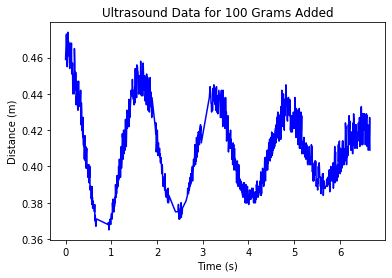

In [0]:
time = data[:,0]/1000  # Column 1 is data for time, adjusted units from ms to s.
accel = -data[:,1]/100 # Column 2 is data for x-accel, adjusted units from cm/s^2 to m/s^2.
dist = data[:,4]/1000  # Column 5 is data for ultrasound distance, adjusted from mm to m.

time = time - time[0]  # Adjust the time array to start at 0 seconds.
accel = accel + 9.81   # Adjust acceleration to take into account gravity.
accel = accel - 20     # Adjust acceleration to take into account the offset.

plt.plot(time,dist, color = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('Ultrasound Data for 100 Grams Added')
plt.show()

Text(0, 0.5, 'Acceleration (m/s^2)')

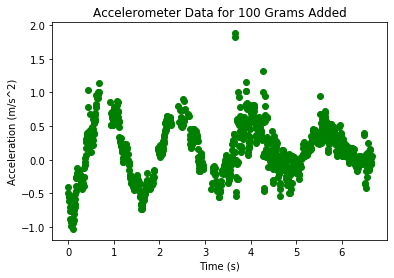

In [0]:
plt.scatter(time,accel,color="green")
plt.title('Accelerometer Data for 100 Grams Added')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')

In [0]:
def damp_cos_fit_fun(parameters, time):
  A = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  a = parameters[4] 
  y = (A*(2.71828**(a*time))*np.cos(omega * time - phi)) + offset
  return y

def damp_cos_shift_fun(best_parameters, time):
  A = best_parameters[0]
  omega = best_parameters[1]
  offset = 0
  phi = best_parameters[3]
  a = best_parameters[4] 
  y = (A*(2.71828**(a*time))*np.cos(omega * time - phi)) + offset
  return y

In [0]:
def get_residuals(parameters, position_data, time_data):
  # obtain cos function based on parameters
  theoretical_function = damp_cos_fit_fun(parameters, time_data)
  # store the differences in absolute value between original data values and predicted values
  residuals = np.abs(theoretical_function - position_data)
  # return these difference values
  return residuals

In [0]:
# Make reasonable guesses for parameters like amplitude, omega, offset and phi based on the plot above 
guess_amplitude = 0.075
guess_omega = 4.75
guess_offset = .53
guess_phi = .1
guess_exp = -1/2

# Store all the guessed parameters in an array
guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi, guess_exp]

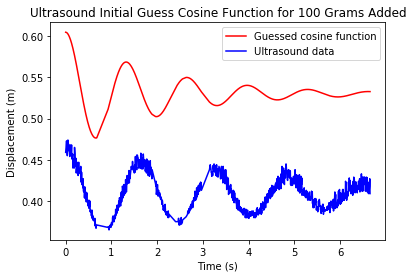

In [0]:
# Create a sin function based on original guess parameters
theoretical_guess_function = damp_cos_fit_fun(guess_parameters, time)

# Plot the guess function
plt.plot(time, theoretical_guess_function,color="red",label="Guessed cosine function")

# Plot the original data
plt.plot(time, dist, color = "blue", label="Ultrasound data")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Ultrasound Initial Guess Cosine Function for 100 Grams Added")
plt.legend()

In [0]:
# The imported least_squares function minimizes the residuals
res_lsq = least_squares(get_residuals, guess_parameters, args=(dist,time))
# We store the values of best possible parameters obtained for amplitude, omega, offset, phase, and exponent in best_parameters
best_parameters = res_lsq['x']

Best Amplitude: 0.0556526810149201
Best Omega: 3.895017792454302
Best Offset: 0.4080051244065989
Best Phi: 0.126036105431587
Best Exponent: -0.19996740607453586


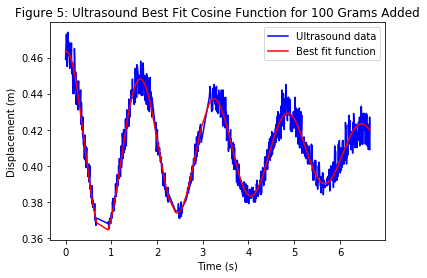

In [0]:
# The best fit sin function will have the best_parameters as an input to the sin function that we created
fitted_function = damp_cos_fit_fun(best_parameters, time)

# Plot the original data and the best fit function on the same plot
plt.plot(time, dist, color = "blue", label="Ultrasound data")
plt.plot(time, fitted_function, color = 'red', label="Best fit function")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.title("Figure 5: Ultrasound Best Fit Cosine Function for 100 Grams Added")

# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best Offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))
print('Best Exponent: ' + str(best_parameters[4]))

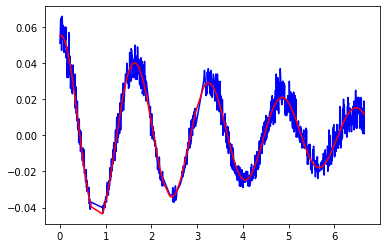

In [0]:
# This cell shifts the Ultrasound data down such that the offset is zero.
# This may or may not be used in the future for analysis, for now it is extra (not a figure).
shift_dist = dist - best_parameters[2]
plt.plot(time, shift_dist, color = "blue", label="Shifted Ultrasound data")
shifted_function = damp_cos_shift_fun(best_parameters, time)
plt.plot(time, shifted_function, color="red", label= "Shifted Best Fit")

2nd Diff Amplitude: 0.8465413103767171
2nd Diff Omega: 3.895017792454302
2nd Diff Offset: 0
2nd Diff Phi: 3.165040268853877
2nd Diff Exponent: -0.19996740607453586


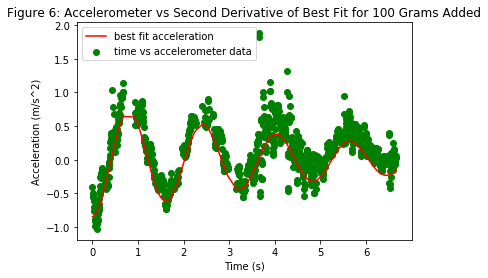

In [0]:
# Store the parameters in variables for cleaner equations.
A = best_parameters[0]
w = best_parameters[1]
o = best_parameters[2]
p = best_parameters[3]
a = best_parameters[4]
 
 # Manually take the second derivative of the best fit, derivation of equation in slides/will be in report.
acc_fit = ((A)*(a*a+w*w)*(2.71828**(a*time))*np.cos(w * time - p - 2*np.arctan(-w/a)))

# Plot the second derivative of the ultrasound best fit against the accelerometer data.
plt.scatter(time, accel, color = 'green', label = 'time vs accelerometer data')
plt.plot(time, acc_fit, color = 'red', label = 'best fit acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Figure 6: Accelerometer vs Second Derivative of Best Fit for 100 Grams Added')
plt.legend()

# Print the values of the 2nd Diff parameters
print('2nd Diff Amplitude: ' + str((A)*(a*a+w*w)))
print('2nd Diff Omega: ' + str(w))
print('2nd Diff Offset: ' + str(0))
print('2nd Diff Phi: ' + str(p + 2*np.arctan(-w/a)))
print('2nd Diff Exponent: ' + str(a))

In [0]:
##############################################
################# Analysis ###################
##############################################
m = .1 + .175 + .213         # Total Mass is the mass of the Arduino plus the Magnet plus the added mass.
k = 6.61                     # Spring Constant of Two Springs in Parallel.
print('m = ' + str(m))
print('k = ' + str(k))
b = -2 * a * m               # Calculating the damping constant b from the "a" term of the original ultrasound best fit function.
print('b = ' + str(b))
wb = ((k/m)-(b*b/m/m/4))**.5 # Calculate the angular frequency using the calculated damping constant "b".
print('wb = ' + str(wb))     
print('w = ' + str(w))
error = (w-wb)/w             # Calculate the percent error between the angular frequency of the best fit and the calculated angular frequency.
error *= 100
print('error = ' + str(error) + ' %')
w0 = (k/m)**.5               # Calculate the undamped angular frequency.
print ('w0 = ' + str(w0))

m = 0.488
k = 6.61
b = 0.195168188328747
wb = 3.6749278909552685
w = 3.895017792454302
error = 5.650549322917261 %
w0 = 3.6803643796794248
